In [67]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [70]:
df = pd.read_csv("data/orders.csv")
df

,33557880,2019-03-10 23:59:59.000000,AR,14200,DeliveredStatus,PAID,1,4.54,8.64
0,33512615,2019-03-10 23:58:32.000000,TR,28725,DeliveredStatus,PAID,1,3.76,3.76
1,33512451,2019-03-10 23:57:56.000000,TR,28725,DeliveredStatus,PAID,1,2.86,2.86
2,33530892,2019-03-10 23:57:33.000000,ES,19777,CanceledStatus,PAID,1,12.95,0.00
3,33557765,2019-03-10 23:57:21.000000,AR,34565,DeliveredStatus,PAID,2,2.86,6.48
4,33512273,2019-03-10 23:57:13.000000,TR,63536,DeliveredStatus,PAID,4,1.88,1.96
...,...,...,...,...,...,...,...,...,...
60394,31960607,2019-03-01 00:04:31.000000,TR,68820,DeliveredStatus,PAID,2,10.17,10.33
60395,32002079,2019-03-01 00:03:53.000000,AR,50175,CanceledStatus,PAID,1,3.80,0.00
60396,32002046,2019-03-01 00:03:06.000000,AR,55159,DeliveredStatus,PAID,1,4.24,4.91
60397,32001950,2019-03-01 00:01:01.000000,AR,62504,CanceledStatus,PAID,1,4.91,0.00


In [71]:
df.rename(columns={"33557880": "order_id"}, inplace=True)
df.rename(columns={"2019-03-10 23:59:59.000000": "activation_time_local"}, inplace = True)
df.rename(columns={"AR": "country_code"}, inplace=True)
df.rename(columns={"14200": "store_address"}, inplace=True)
df.rename(columns={"DeliveredStatus": "final_status"}, inplace=True)
df.rename(columns={"PAID": "payment_status"}, inplace=True)
df.rename(columns={"1": "products"}, inplace=True)
df.rename(columns={"4.54": "products_total"}, inplace=True)
df.rename(columns={"8.64": "purchase_total_price"}, inplace=True)

In [72]:
df= df.drop_duplicates()
df

,order_id,activation_time_local,country_code,store_address,final_status,payment_status,products,products_total,purchase_total_price
0,33512615,2019-03-10 23:58:32.000000,TR,28725,DeliveredStatus,PAID,1,3.76,3.76
1,33512451,2019-03-10 23:57:56.000000,TR,28725,DeliveredStatus,PAID,1,2.86,2.86
2,33530892,2019-03-10 23:57:33.000000,ES,19777,CanceledStatus,PAID,1,12.95,0.00
3,33557765,2019-03-10 23:57:21.000000,AR,34565,DeliveredStatus,PAID,2,2.86,6.48
4,33512273,2019-03-10 23:57:13.000000,TR,63536,DeliveredStatus,PAID,4,1.88,1.96
...,...,...,...,...,...,...,...,...,...
60394,31960607,2019-03-01 00:04:31.000000,TR,68820,DeliveredStatus,PAID,2,10.17,10.33
60395,32002079,2019-03-01 00:03:53.000000,AR,50175,CanceledStatus,PAID,1,3.80,0.00
60396,32002046,2019-03-01 00:03:06.000000,AR,55159,DeliveredStatus,PAID,1,4.24,4.91
60397,32001950,2019-03-01 00:01:01.000000,AR,62504,CanceledStatus,PAID,1,4.91,0.00


In [73]:
# 1. What percent of orders are under-authorized? 

In [74]:
df_under_authorized = []

for index, row in df.iterrows():
    if row['products_total'] < row['purchase_total_price']:
        df_under_authorized.append(row)
        
df_under_authorized = pd.DataFrame(df_under_authorized)
df_under_authorized

,order_id,activation_time_local,country_code,store_address,final_status,payment_status,products,products_total,purchase_total_price
3,33557765,2019-03-10 23:57:21.000000,AR,34565,DeliveredStatus,PAID,2,2.86,6.48
4,33512273,2019-03-10 23:57:13.000000,TR,63536,DeliveredStatus,PAID,4,1.88,1.96
6,33511759,2019-03-10 23:55:21.000000,TR,47493,DeliveredStatus,PAID,2,2.37,2.45
9,33523444,2019-03-10 23:53:38.000000,RO,72549,DeliveredStatus,PAID,2,2.05,10.17
11,33530379,2019-03-10 23:52:20.000000,FR,4444,DeliveredStatus,PAID,1,8.10,10.20
...,...,...,...,...,...,...,...,...,...
60379,31965637,2019-03-01 00:30:50.000000,TR,44528,DeliveredStatus,PAID,1,3.44,6.89
60388,32002620,2019-03-01 00:14:57.000000,AR,62623,DeliveredStatus,PAID,2,1.79,5.36
60394,31960607,2019-03-01 00:04:31.000000,TR,68820,DeliveredStatus,PAID,2,10.17,10.33
60396,32002046,2019-03-01 00:03:06.000000,AR,55159,DeliveredStatus,PAID,1,4.24,4.91


In [75]:
# 2. What percent of orders would be correctly authorized w/ incremental authorisation (+20%) on the amount at checkout? 

In [76]:
#1. en el df original, crear nueva columna "products_total_checkout" = "products_total_checkout" * 1.2
#2. reevaluar el de antes
#3. mirar cuantas rows tiene respecto al primer df
#4. dar respuesta

In [77]:
df["products_total_checkout"] = df["products_total"]*1.2


In [78]:
df_under_authorized_checkout = []

for index, row in df.iterrows():
    if row['products_total_checkout'] < row['purchase_total_price']:
        df_under_authorized_checkout.append(row)
        
df_under_authorized_checkout = pd.DataFrame(df_under_authorized_checkout)
df_under_authorized_checkout

,order_id,activation_time_local,country_code,store_address,final_status,payment_status,products,products_total,purchase_total_price,products_total_checkout
3,33557765,2019-03-10 23:57:21.000000,AR,34565,DeliveredStatus,PAID,2,2.86,6.48,3.432
9,33523444,2019-03-10 23:53:38.000000,RO,72549,DeliveredStatus,PAID,2,2.05,10.17,2.460
11,33530379,2019-03-10 23:52:20.000000,FR,4444,DeliveredStatus,PAID,1,8.10,10.20,9.720
19,33509944,2019-03-10 23:48:55.000000,TR,44528,DeliveredStatus,PAID,2,4.42,5.73,5.304
29,33503904,2019-03-10 23:43:03.000000,TR,34471,DeliveredStatus,PAID,1,5.03,10.71,6.036
...,...,...,...,...,...,...,...,...,...,...
60370,32004484,2019-03-01 01:06:46.000000,AR,33382,DeliveredStatus,PAID,2,9.83,21.44,11.796
60372,31969645,2019-03-01 00:57:47.000000,TR,44473,DeliveredStatus,PAID,1,3.28,6.56,3.936
60373,31968802,2019-03-01 00:51:19.000000,TR,52885,DeliveredStatus,PAID,1,2.46,5.25,2.952
60379,31965637,2019-03-01 00:30:50.000000,TR,44528,DeliveredStatus,PAID,1,3.44,6.89,4.128


In [79]:
percentage_good_with_checkout = df_under_authorized_checkout.shape[0] / df.shape[0]
percentage_good_with_checkout

0.3096408880941737

In [80]:
#3. Are there differences when split by country? 

In [81]:
#PRIMERO sacamos Dataframe de autorizados:
df_authorized = []

for index, row in df.iterrows():
    if row['products_total'] >= row['purchase_total_price']:
        df_authorized.append(row)
        
df_authorized = pd.DataFrame(df_authorized)


In [82]:
#Values counts de pedidos TOTALES
df["country_code"].value_counts()

country_code
AR    13191
ES    12806
TR     6348
PE     4785
UA     4119
IT     2808
EC     2508
RO     2167
FR     2136
EG     1828
MA     1632
CR     1107
CL     1104
PA     1013
PT      909
GT      567
GE      546
DO      500
UY      190
KE       94
PR       33
CI        6
BR        2
Name: count, dtype: int64

In [83]:
#value counts de paises de pedidos AUTORIZADOS
df_authorized["country_code"].value_counts()

country_code
AR    5198
ES    4841
TR    3132
UA    2116
PE    2110
IT    1255
RO    1161
MA     968
EC     897
FR     734
EG     678
CR     610
PA     397
PT     381
GT     379
GE     263
DO     182
CL     143
UY     109
KE      41
PR      19
CI       4
BR       1
Name: count, dtype: int64

In [84]:
#value counts de paises de pedidos no autorizados
df_under_authorized["country_code"].value_counts()

country_code
AR    7993
ES    7965
TR    3216
PE    2675
UA    2003
EC    1611
IT    1553
FR    1402
EG    1150
RO    1006
CL     961
MA     664
PA     616
PT     528
CR     497
DO     318
GE     283
GT     188
UY      81
KE      53
PR      14
CI       2
BR       1
Name: count, dtype: int64

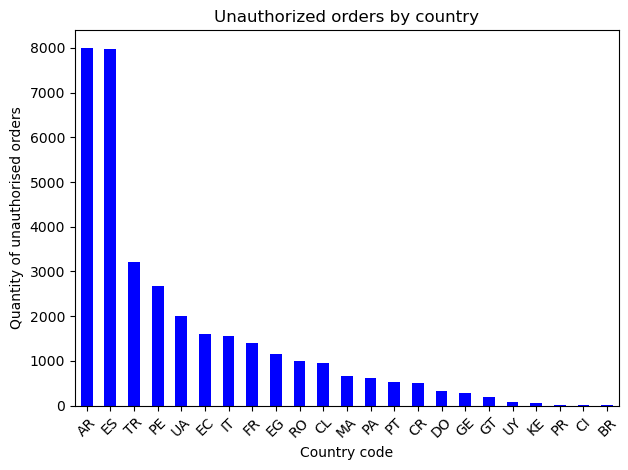

In [85]:
#Grafico:

count = df_under_authorized["country_code"].value_counts()
count.plot(kind='bar', color='blue')  
plt.title('Unauthorized orders by country')
plt.xlabel('Country code')  
plt.ylabel('Quantity of unauthorised orders')  
plt.xticks(rotation=45)  
plt.tight_layout()  
plt.show() 

In [86]:
# 4. For the remainder of orders that would be outside of incremental auth what values would be necessary to capture the remaining amount?

In [87]:
df_under_authorized["remaining_amount"] = df_under_authorized["purchase_total_price"] - df_under_authorized["products_total"]
df_under_authorized

,order_id,activation_time_local,country_code,store_address,final_status,payment_status,products,products_total,purchase_total_price,remaining_amount
3,33557765,2019-03-10 23:57:21.000000,AR,34565,DeliveredStatus,PAID,2,2.86,6.48,3.62
4,33512273,2019-03-10 23:57:13.000000,TR,63536,DeliveredStatus,PAID,4,1.88,1.96,0.08
6,33511759,2019-03-10 23:55:21.000000,TR,47493,DeliveredStatus,PAID,2,2.37,2.45,0.08
9,33523444,2019-03-10 23:53:38.000000,RO,72549,DeliveredStatus,PAID,2,2.05,10.17,8.12
11,33530379,2019-03-10 23:52:20.000000,FR,4444,DeliveredStatus,PAID,1,8.10,10.20,2.10
...,...,...,...,...,...,...,...,...,...,...
60379,31965637,2019-03-01 00:30:50.000000,TR,44528,DeliveredStatus,PAID,1,3.44,6.89,3.45
60388,32002620,2019-03-01 00:14:57.000000,AR,62623,DeliveredStatus,PAID,2,1.79,5.36,3.57
60394,31960607,2019-03-01 00:04:31.000000,TR,68820,DeliveredStatus,PAID,2,10.17,10.33,0.16
60396,32002046,2019-03-01 00:03:06.000000,AR,55159,DeliveredStatus,PAID,1,4.24,4.91,0.67


In [88]:
#5. Which stores are the most problematic in terms of orders and monetary value? 

In [89]:
def under_authorized(row):
    return True if row['products_total'] < row['purchase_total_price'] else False

df['under_authorized'] = df.apply(under_authorized, axis=1)

In [90]:
monetary_value = df.groupby('store_address')['purchase_total_price'].sum().sort_values(ascending=False)
monetary_value

store_address
28669    6376.07
12513    5307.10
28671    4714.97
28712    3781.39
14455    3514.33
          ...   
65158       0.00
65175       0.00
65286       0.00
71756       0.00
53591       0.00
Name: purchase_total_price, Length: 5755, dtype: float64

In [91]:
orders_value = df.groupby('store_address')['under_authorized'].sum().sort_values(ascending = False)
orders_value

store_address
28671    448
28712    217
28286    204
14455    179
11694    160
        ... 
67405      0
67399      0
67375      0
67350      0
75236      0
Name: under_authorized, Length: 5755, dtype: int64

In [ ]:
# 6. For under-auth orders is there a correlation between the difference in the prices and
# the cancellation of the order? In other words: Is an order more likely to be
# cancelled as the price difference increases? 

In [93]:
#pseudocode:
#1. crear columna para saber diferencia de precios
#2. crear grafico de puntitos con dos colores y a funcionar colega

,order_id,activation_time_local,country_code,store_address,final_status,payment_status,products,products_total,purchase_total_price,products_total_checkout,under_authorized
0,33512615,2019-03-10 23:58:32.000000,TR,28725,DeliveredStatus,PAID,1,3.76,3.76,4.512,False
1,33512451,2019-03-10 23:57:56.000000,TR,28725,DeliveredStatus,PAID,1,2.86,2.86,3.432,False
2,33530892,2019-03-10 23:57:33.000000,ES,19777,CanceledStatus,PAID,1,12.95,0.00,15.540,False
3,33557765,2019-03-10 23:57:21.000000,AR,34565,DeliveredStatus,PAID,2,2.86,6.48,3.432,True
4,33512273,2019-03-10 23:57:13.000000,TR,63536,DeliveredStatus,PAID,4,1.88,1.96,2.256,True
...,...,...,...,...,...,...,...,...,...,...,...
60394,31960607,2019-03-01 00:04:31.000000,TR,68820,DeliveredStatus,PAID,2,10.17,10.33,12.204,True
60395,32002079,2019-03-01 00:03:53.000000,AR,50175,CanceledStatus,PAID,1,3.80,0.00,4.560,False
60396,32002046,2019-03-01 00:03:06.000000,AR,55159,DeliveredStatus,PAID,1,4.24,4.91,5.088,True
60397,32001950,2019-03-01 00:01:01.000000,AR,62504,CanceledStatus,PAID,1,4.91,0.00,5.892,False


In [94]:
df["remaining_amount"] = df["purchase_total_price"] - df["products_total"]
df

,order_id,activation_time_local,country_code,store_address,final_status,payment_status,products,products_total,purchase_total_price,products_total_checkout,under_authorized,remaining_amount
0,33512615,2019-03-10 23:58:32.000000,TR,28725,DeliveredStatus,PAID,1,3.76,3.76,4.512,False,0.00
1,33512451,2019-03-10 23:57:56.000000,TR,28725,DeliveredStatus,PAID,1,2.86,2.86,3.432,False,0.00
2,33530892,2019-03-10 23:57:33.000000,ES,19777,CanceledStatus,PAID,1,12.95,0.00,15.540,False,-12.95
3,33557765,2019-03-10 23:57:21.000000,AR,34565,DeliveredStatus,PAID,2,2.86,6.48,3.432,True,3.62
4,33512273,2019-03-10 23:57:13.000000,TR,63536,DeliveredStatus,PAID,4,1.88,1.96,2.256,True,0.08
...,...,...,...,...,...,...,...,...,...,...,...,...
60394,31960607,2019-03-01 00:04:31.000000,TR,68820,DeliveredStatus,PAID,2,10.17,10.33,12.204,True,0.16
60395,32002079,2019-03-01 00:03:53.000000,AR,50175,CanceledStatus,PAID,1,3.80,0.00,4.560,False,-3.80
60396,32002046,2019-03-01 00:03:06.000000,AR,55159,DeliveredStatus,PAID,1,4.24,4.91,5.088,True,0.67
60397,32001950,2019-03-01 00:01:01.000000,AR,62504,CanceledStatus,PAID,1,4.91,0.00,5.892,False,-4.91
